<a href="https://colab.research.google.com/github/s24966904/note/blob/main/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92/Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import pandas as pd

df=pd.DataFrame(iris["data"],columns=['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

target=pd.DataFrame(iris["target"],columns=['target_names'])
df["target"]=target
df.to_csv("iris.csv",encoding="utf-8",index=False)

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(['target'],axis=1),df['target'],test_size=.1)

In [4]:
from sklearn.cluster import KMeans
clu=KMeans(n_clusters=3)
clu.fit(x_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
clu.labels_

array([1, 1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 1,
       2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 0,
       0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1,
       2, 1, 0, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 1, 1, 1,
       1, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1,
       1, 2, 1], dtype=int32)

In [6]:
from sklearn.metrics import accuracy_score

pre =clu.predict(x_test)
print('預測標籤',list(pre))
print('真正標籤',list(y_test))
accuracy_score(pre,y_test)

預測標籤 [2, 2, 1, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0]
真正標籤 [1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 2, 0, 1, 2]


0.06666666666666667

In [7]:
from sklearn.metrics import silhouette_score

x=df.drop(['target'],axis=1)
plotx=[]
ploty=[]

for k in range(2,6):

  clu=KMeans(n_clusters=k)
  clu.fit(x)
  s= silhouette_score(x,clu.labels_)
  plotx.append(k)
  ploty.append(s)

print('K值:',plotx)
print('Score值：',ploty)

K值: [2, 3, 4, 5]
Score值： [0.681046169211746, 0.5528190123564091, 0.49745518901737446, 0.4887488870931048]


Text(0, 0.5, 'score')

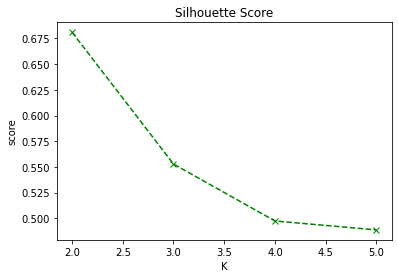

In [10]:
import matplotlib.pyplot as plt
plt.plot(plotx,ploty,'x--g')
plt.title('Silhouette Score')
plt.xlabel('K')
plt.ylabel('score')
